## **EXPLORATORY DATA ANALYSIS**
### Título

### ***ÍNDICE***
1. Importación de librerías
2. Carga de datos
3. Reducción de datos
4. Tipos de datos y valores nulos
5. Decodificación de variables
6. Renombrar columnas


>  **1.** **IMPORTACIÓN DE LIBRERÍAS**

In [711]:
# Importar librerías

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

>  **2.** **CARGA DE DATOS**

In [712]:
# Carga de datos DataFrame principal

df = pd.read_csv("data/EILU_2019.csv",sep="\t")

C:\Users\beatr\AppData\Local\Temp\ipykernel_25576\4148141566.py:3: DtypeWarning: Columns (119) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/EILU_2019.csv",sep="\t")


In [713]:
# Obtenemos un vistazo del df, sus columnas y el formato de sus filas
df

,IDENT,SEXO,EDAD,NACIO,NACIO1,NACIO2,PAIS_NACI,TITU,RAMA,AMBITO,...,ANHCUR4,DENCUR5,DURCUR5,RESCUR5,ANHCUR5,DENCUR6,DURCUR6,RESCUR6,ANHCUR6,FACTOR
0,1,1,1,1,,,1,11101,3,11,...,,,,,,,,,,9.894742
1,2,1,1,1,,,1,11101,3,11,...,,,,,,,,,,9.894742
2,3,1,1,1,,,1,11101,3,11,...,,,,,,,,,,10.965467
3,4,1,1,1,,,1,11101,3,11,...,,,,,,,,,,10.859689
4,5,1,1,1,,,1,11101,3,11,...,,,,,,,,,,10.859689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31646,31647,2,2,1,,,1,109999,3,109,...,,,,,,,,,,1.780764
31647,31648,2,2,1,,,1,109999,3,109,...,,,,,,,,,,1.780764
31648,31649,1,3,1,,,1,109999,3,109,...,,,,,,,,,,3.038041
31649,31650,1,1,1,,,1,109999,3,109,...,,,,,,,,,,3.038041


In [714]:
df.shape

(31651, 299)

Observamos que tiene **31651 filas**. Es un nivel alto de datos y no todos los registros nos interesarán para el estudio. Más adelante filtraremos aquellas filas que no nos interesan. En cuanto a las columnas, un valor de **299 columnas** es grande y tenemos que tener en cuenta aquellas que sí nos serán de utilidad para comprobar nuestra hipótesis y formular las conclusiones, es decir, aquellas que realmente tienen valor para nuestro análisis exploratorio

>  **3.** **REDUCCIÓN DE DATOS**

Para saber qué columnas aportan valor a nuestro estudio recurrimos a un segundo archivo: "data/dr_EILU_2019.xlsx" Nuestro conjunto de datos completo se compone de dos archivos: un csv con los registros codificados de 31561 individuos y el archivo excel (del que más adelante hablaremos) con la codificación y diseño de los datos. Este archivo nos puede servir de guía para comprender los campos y valores del DataFrame principal.

In [715]:
# Cargamos el diseño del conjunto de datos que contiene la información de las columnas codificadas

cod = pd.read_excel("data/dr_EILU_2019.xlsx",header=1,usecols = 'A:I') # O eliminar las col unnamed
cod

,Variable,Diccionario de la variable,Longitud,Tipo,Decimales,Posición,Orden,Diccionario ubicado en la hoja…,Descripción
0,IDENT,NaN,5,N,NaN,1.0,1.0,NaN,Nº de identificación de la persona
1,SEXO,TSEXO,1,A,NaN,6.0,2.0,Tablas1,Sexo
2,EDAD,TEDAD,1,A,NaN,7.0,3.0,Tablas1,Grupo de edad (a 31-dic-2019)
3,NACIO,TNACIO,1,A,NaN,8.0,4.0,Tablas1,Nacionalidad
4,NACIO1,TNACIOP,1,A,NaN,9.0,5.0,Tablas1,País de nacionalidad 1
...,...,...,...,...,...,...,...,...,...
295,DURCUR6,TDrCurs,1,A,NaN,371.0,296.0,Tablas2,Duración del sexto curso de formación del SEPE...
296,RESCUR6,TReCurs,1,A,NaN,372.0,297.0,Tablas2,Resultado del sexto curso de formación del SEP...
297,ANHCUR6,TAnCurs,4,A,NaN,373.0,298.0,Tablas2,Año de finalización del sexto curso de formaci...
298,FACTOR,NaN,11,N,6.0,377.0,299.0,NaN,Factor de elevación (seis decimales )


Este archivo, se trata de un formato excel con varías páginas. En la primera hoja, contiene un listado con toda las variables y su descripción. Además, contiene una variable que te indica en qué página del excel se encuentra la codificación de cada variable.

Tras estudiar los diferentes campos, nos quedamos con las siguientes columnas:

In [716]:
# Limpieza de datos: mediante selección de coolumnas (podría haberse hecho a la inversa con un drop)
students = df.copy()

students= students[['IDENT','SEXO','EDAD','NACIO','TITU','RAMA','AMBITO','T_UNIV','DISCA','ESTUDIOS_PADRE','ESTUDIOS_MADRE',
                  'SAT1','SAT2','EST_B11_1','EST_B11_2','EST_B11_3','EST_B11_4','EST_B11_5','EST_B11_6','EST_B12',
                  'EST_B16','EST_B24','EST_B28','IDIOMAS', 'IDI_MT1', 'IDI_MT2','TIC','IDIOMA1','NIV_ID1','TIPOACREIDI1',
                  'IDIOMA2','NIV_ID2','TIPOACREIDI2','TRBPRN1','TRBPRN2','TRINAC_D4',
                  'TRINAC_D5','TRINAC_D6','TRPARA_D5','TRPARA_D6','TRAC_D9','LUG_TRAB_PAIS','SIT_PRO','JORNADA','TR_TAM',
                  'TR_SUELDO','TR_D19','TR_D21', 'HL_E1','HL_E2','HL_E3','HL_E5','HATR_E11','HATR_E12','P_CONTI','PR_SIT_PR',
                  'PR_JOR','PR_NIVEL','PR_AREA','PR_CONOC','PR_SUELDO','HATR_E27','NOTRAB_BUS','NOTRAB_BUSM','NOTRAB_BUST']]

In [717]:
students

,IDENT,SEXO,EDAD,NACIO,TITU,RAMA,AMBITO,T_UNIV,DISCA,ESTUDIOS_PADRE,...,PR_SIT_PR,PR_JOR,PR_NIVEL,PR_AREA,PR_CONOC,PR_SUELDO,HATR_E27,NOTRAB_BUS,NOTRAB_BUSM,NOTRAB_BUST
0,1,1,1,1,11101,3,11,2,2,2,...,1,1,3,2,1,3,1,,,
1,2,1,1,1,11101,3,11,2,2,3,...,3,1,3,2,1,3,1,,,
2,3,1,1,1,11101,3,11,1,2,3,...,3,2,4,3,2,3,1,,,
3,4,1,1,1,11101,3,11,1,2,7,...,3,2,4,3,2,2,1,,,
4,5,1,1,1,11101,3,11,1,2,8,...,3,2,3,2,1,3,2,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31646,31647,2,2,1,109999,3,109,1,2,9,...,2,2,2,3,1,3,1,,,
31647,31648,2,2,1,109999,3,109,1,2,6,...,2,2,3,1,2,3,2,,,
31648,31649,1,3,1,109999,3,109,1,2,3,...,2,2,3,1,1,3,1,,,
31649,31650,1,1,1,109999,3,109,1,2,8,...,2,1,3,1,9,9,1,,,


La información de las columnas seleccionadas es la siguiente:

In [718]:
# Fijamos la columna 'Variable' como índice de este DataFrame, con el fin de poder buscar más fácilmente por nombres de variables.
cod.set_index('Variable',inplace=True)

In [719]:
cod.index

Index(['IDENT', 'SEXO', 'EDAD', 'NACIO', 'NACIO1', 'NACIO2', 'PAIS_NACI',
       'TITU', 'RAMA', 'AMBITO',
       ...
       'DENCUR5', 'DURCUR5', 'RESCUR5', 'ANHCUR5', 'DENCUR6', 'DURCUR6',
       'RESCUR6', 'ANHCUR6', 'FACTOR', 'TOTAL'],
      dtype='object', name='Variable', length=300)

In [720]:
columns_list = students.columns.to_list() # Lista con el nombre de las columnas de nuestro DataFrame

# Por cada columna del DataFrame students nos imprime la descripción de la misma.

descripciones = [] # Lista de listas donde cada valor será el par [varialbe,descripción]

for variable in cod.index:
    if variable in columns_list:
        descripciones.append([variable, cod.loc[variable]['Descripción']])

In [721]:
for variable, descripcion in descripciones:
    print(f"{variable} : {descripcion}")

IDENT : Nº de identificación de la persona
SEXO : Sexo
EDAD : Grupo de edad (a 31-dic-2019)
NACIO : Nacionalidad
TITU : Titulación
RAMA : Rama de conocimiento de la titulación
AMBITO : Ámbito de estudio
T_UNIV : Tipo de Universidad
DISCA : Tiene discapacidad reconocida superior al 33%
ESTUDIOS_PADRE : Nivel de formación máximo alcanzado por el padre
ESTUDIOS_MADRE : Nivel de formación máximo alcanzado por la madre
SAT1 : Si tuviese que empezar volvería a cursar estudios universitarios
SAT2 : Si tuviese que empezar volvería a estudiar la misma titulación
EST_B11_1 : Otros estudios: Grado / Diplomatura / Licenciatura o equivalente
EST_B11_2 : Otros estudios: Máster universitario
EST_B11_3 : Otros estudios: Doctorado universitario
EST_B11_4 : Otros estudios: Estudios artísticos superiores (artes plásticas, diseño, música y danza, arte dramático o conservación y restauración de bienes culturales)
EST_B11_5 : Otros estudios: Ciclos Formativos de grado superior (formación profesional, artes 

Con el fin de tener esta información a nuestra disposición durante el desarrollo del análisis, crearemos un archivo .txt con la salida anterior para poder recurrir a el cuando sea necesario.

In [722]:
# Escribir la lista de variables y descripciones en el archivo TXT
with open("data/descripciones_columnas", 'w', encoding='utf-8') as archivo_descripciones:
    # Escribir cada línea de variables y descripciones
    for variable, descripcion in descripciones:                 # Recorremos la lista creada anteriormente
        archivo_descripciones.write(f'{variable} : {descripcion}\n')

De esta forma hemos reducido el número de columnas de 299 a 69

>  **4.** **TIPOS DE DATOS Y VALORES NULOS**

In [723]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31651 entries, 0 to 31650
Data columns (total 65 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   IDENT           31651 non-null  int64 
 1   SEXO            31651 non-null  int64 
 2   EDAD            31651 non-null  int64 
 3   NACIO           31651 non-null  int64 
 4   TITU            31651 non-null  int64 
 5   RAMA            31651 non-null  int64 
 6   AMBITO          31651 non-null  int64 
 7   T_UNIV          31651 non-null  int64 
 8   DISCA           31651 non-null  int64 
 9   ESTUDIOS_PADRE  31651 non-null  int64 
 10  ESTUDIOS_MADRE  31651 non-null  int64 
 11  SAT1            31651 non-null  int64 
 12  SAT2            31651 non-null  object
 13  EST_B11_1       31651 non-null  int64 
 14  EST_B11_2       31651 non-null  int64 
 15  EST_B11_3       31651 non-null  int64 
 16  EST_B11_4       31651 non-null  int64 
 17  EST_B11_5       31651 non-null  int64 
 18  EST_B1

Como podemos observar, ninguna columna tiene datos nulos de los 31651. Sin embargo, a simple vista podemos observar campos vacíos. Esto se puede deber a que los valores nulos están contemplados como string con espacios en blanco

In [724]:
students.iloc[0]['NOTRAB_BUS'] # Los registros sin datos, son espacios en blanco


' '

In [725]:
# Podríamos reemplazar estos valores por datos NaN. Sin embargo, más adelante lo realizaremos a la vez que modificamos el tipo de los datos, de un solo paso.
# students.replace(' ', pd.NA, inplace=True)

Otra observación a tener en cuenta es el tipo de datos. A primera vista, todos parecen ser numéricos; sin embargo, se observa que varias columnas están etiquetadas como 'object'. Esto podría atribuirse a lo mencionado anteriormente, donde los valores sin datos se representan como espacios en blanco. Optamos por una transformación que asegure que todos los valores sean tratados como numéricos. Tenemos certeza sobre el diseño de la base de datos y estamos seguros de que todos los datos son numéricos, sin riesgo de pérdida de información.

In [726]:
students.dtypes

IDENT           int64
SEXO            int64
EDAD            int64
NACIO           int64
TITU            int64
                ...  
PR_SUELDO      object
HATR_E27       object
NOTRAB_BUS     object
NOTRAB_BUSM    object
NOTRAB_BUST    object
Length: 65, dtype: object

In [727]:
students = students.apply(pd.to_numeric, errors='coerce', downcast='integer') 

# Al forzar el cambio a tipo numérico con errors='coerce', aquellos valores no numéricos (como los espacios en blanco), serán considerados NaN
# De esta forma realizamos dos pasos en 1: cambiar todos los valores a tipo numérico y modificar los string vacíos a nulos.

In [728]:
students.dtypes

IDENT            int16
SEXO              int8
EDAD              int8
NACIO             int8
TITU             int32
                ...   
PR_SUELDO      float64
HATR_E27       float64
NOTRAB_BUS     float64
NOTRAB_BUSM    float64
NOTRAB_BUST    float64
Length: 65, dtype: object

> **5** **Rename columnas**

> **6** **Data Cleaning/Wrangling**

Algunas variables del dataset necesitan modificaciones para que sea más sencillo trabajar con los datos y para obtener las respuestas que buscamos.

     T_UNIV

Esta variable indica el tipo de universidad:

**1** -	*Universidad Pública presencial*

**2** -	*Universidad Pública a distancia*

**3** -	*Universidad Privada presencial*

**4** -	*Universidad Privada a distancia*

Sin embargo para nuestro análisis contemplamos dos valores: estudiar en una universidad pública o privada. Realizaremos la conversión a la siguiente codificación:

**1** -	*Universidad Pública (presencial o a distancia)*

**2** -	*Universidad Privada (presencial o a distancia)*

In [729]:
# Diccionario con la nueva codificación para la columna 'T_UNIV'
tipo_uni = {1: 'Publica', 2: 'Publica', 3: 'Privada', 4: 'Privada'}

# Reemplaza los valores en la columna 'T_UNIV'
students['T_UNIV'] = students['T_UNIV'].replace(tipo_uni)

********

     TRBPRN1

Variable que indica la situación laboral actual:

**1** - Activo

**2** - En desempleo

**3** - Inactivo

In [730]:
# Diccionario con la nueva codificación para la columna 'TRBPRN1'
empleo = {1: "Trabajando", 2: "Desempleo", 3:"Inactivo"}

students['TRBPRN1'] = students['TRBPRN1'].replace(empleo)

Para el análisis de la situación laboral de los estudiantes a fecha de la obtención de los datos (2019), no nos interesa la población inactiva, ya que no está buscando trabajo activamente. Sin embargo, crearemos un dataframe aparte con esta condición ya que si nos puede interesar otra información relevante como por ejemplo, si nada más terminar sus estudios (en 2014) consiguieron trabajo (aunque actualmente estén inactivos).

In [731]:
students_empleo = students[students['TRBPRN1']!='Inactivo'] # Excluímos aquellos que están inactivos (no buscan empleo)

    > RAMA

Nueva codificación de la variable 'RAMA'

In [732]:
# Diccionario con la nueva codificación para la columna 'RAMA'
ramas = {1: "Artes/Humanidades", 2: "Ciencias", 3:"Ciencias sociales", 4:"Ingeniería/arquitectura", 5:"Salud"}

students['RAMA'] = students['RAMA'].replace(ramas)

> **7** **Exploratory Data Anaysis**

**HIPÓTESIS**

Para comenzar el análisis de las variables, es necesario comprender exactamente qué estamos buscando, con el fin de poder seleccionar aquellos datos que nos aporten mayor información para nuestra hipótesis. 

Nuestro objetivo principal es saber si estudiar en una universidad privada te garantiza más oportunidades laborales al terminar el grado universitario.


 obtener aquellos factores determinantes que influyen a la hora de encontrar trabajo para un estudiante universitario:

- Estudiar en una universidad privada te garantiza más oportunidades de empleo al terminar el grado universitario

- ¿La educación familiar influye en la empleabilidad del estudiante?

- ¿Los idiomas son importantes a la hora de buscar trabajo?

- ¿Los estudiantes de ciertas ramas tiene más oportunidades de encontrar trabajo?

#### **7.1 Análisis univariante**

Dividiremos el análisis univariante en los siguientes apartados:
- Variables relacionadas con la descripción de la población
- Variables relacionadas con la formación de la población
- Variables relacionadas con la formación de los progenitores o tutores legales

##### **Descripción de la población**

    > SEXO

In [733]:
# Diccionario con la nueva codificación para la columna 'SEXO'
sexo = {1: "Hombre", 2: "Mujer"}

students['SEXO'] = students['SEXO'].replace(sexo)

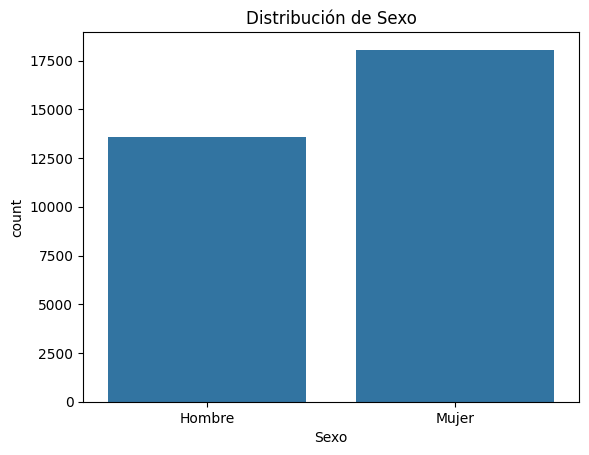

In [734]:
# Representación gráfica de la variable 'SEXO'
sns.countplot(x='SEXO', data=students)

# Labels
plt.title('Distribución de Sexo')
plt.xlabel('Sexo')

plt.show()

    > EDAD

In [735]:
# Diccionario con la nueva codificación para la columna 'EDAD'
edades = {1: "Menores de 30 años", 2: "30-34 años", 3:"Mayores de 35 años"}

students['EDAD'] = students['EDAD'].replace(edades, inplace=True)

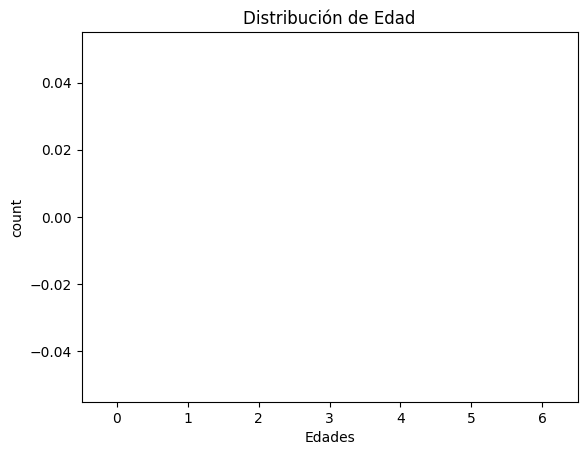

In [736]:
# Representación gráfica de la variable 'EDAD'
sns.countplot(x='EDAD', data=students)

# Labels
plt.title('Distribución de Edad')
plt.xlabel('Edades')

plt.show()

Realizamos un análisis rápido de algunas variables interesantes de nuestro dataset:

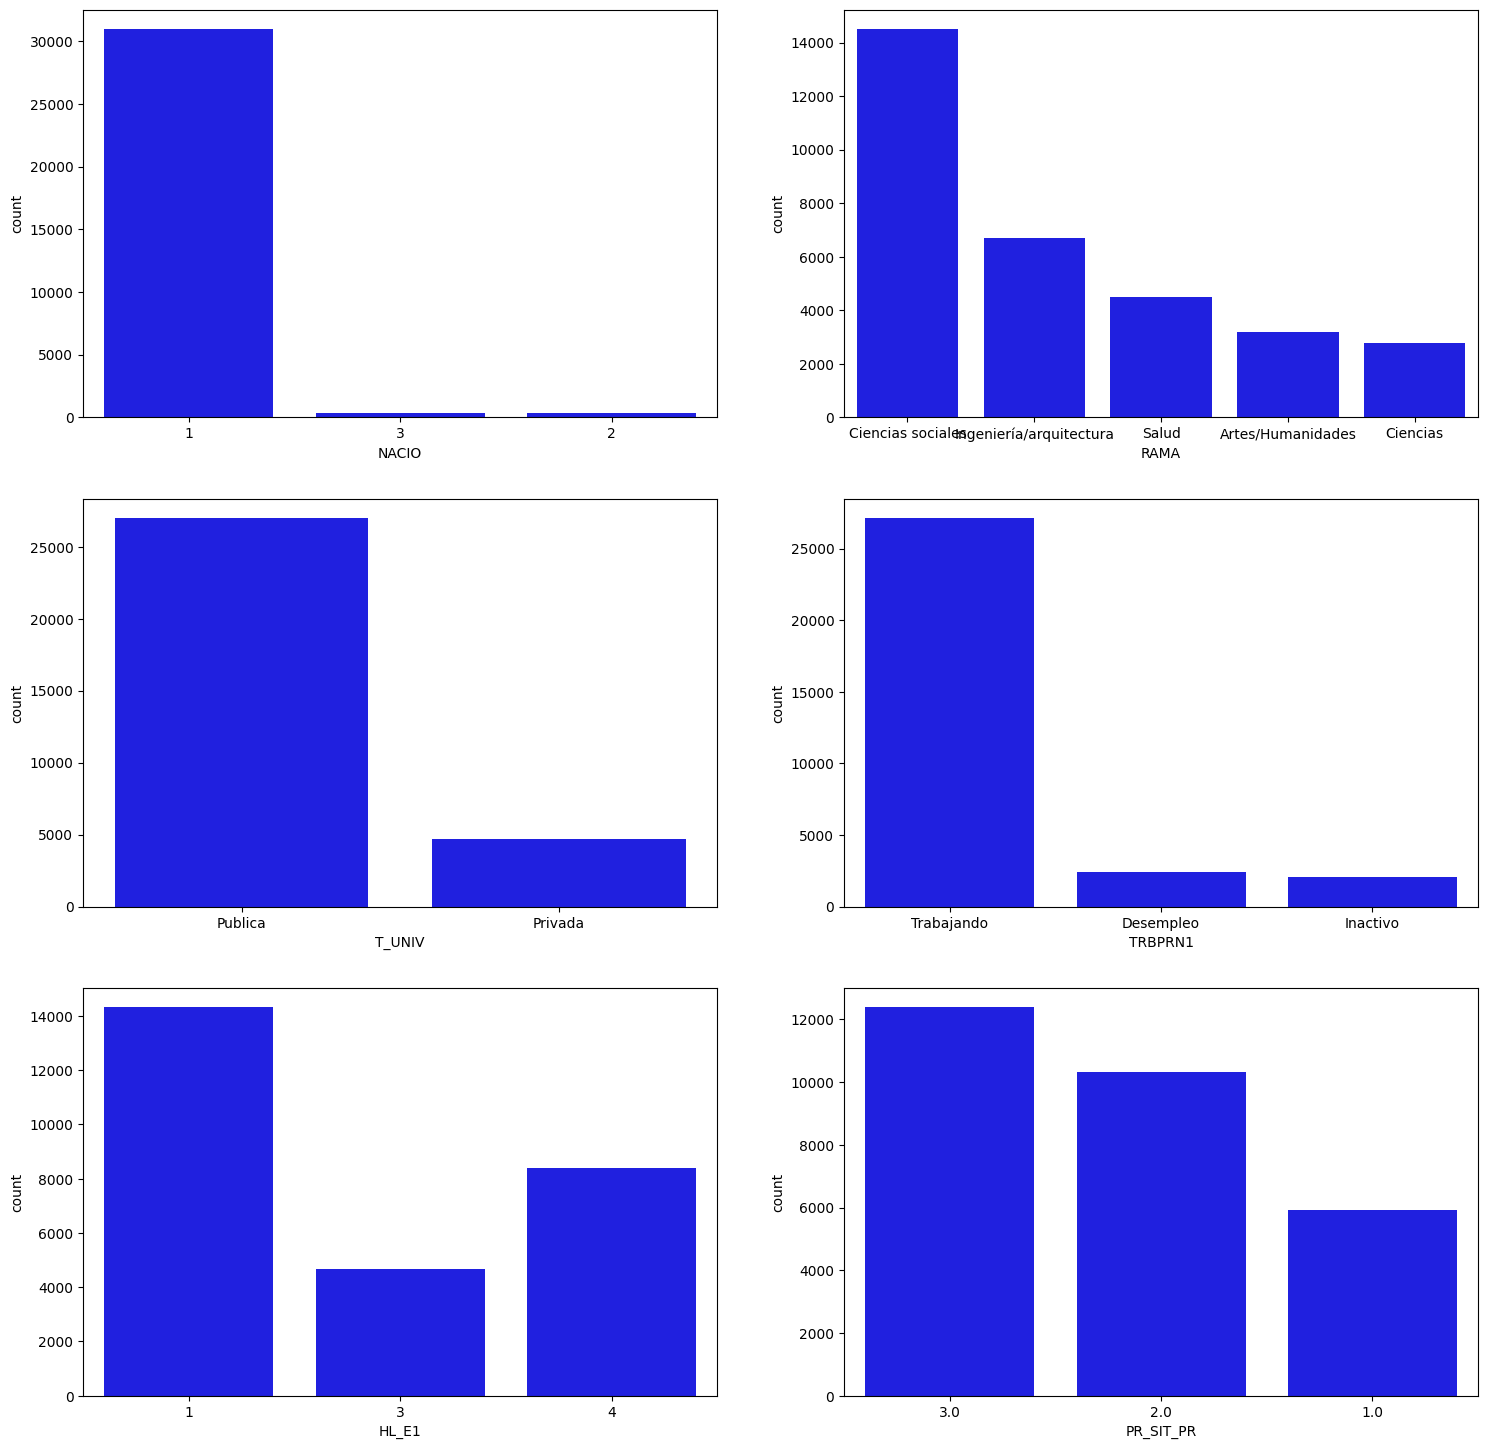

In [737]:
fig, axes = plt.subplots(3, 2, figsize = (18, 18))
sns.countplot(ax = axes[0, 0], x = 'NACIO', data = students, color = 'blue',  # NACIONALIDAD (1: Española)
              order = students['NACIO'].value_counts().index);
sns.countplot(ax = axes[0, 1], x = 'RAMA', data = students, color = 'blue',  # RAMA
              order = students['RAMA'].value_counts().index);
sns.countplot(ax = axes[1, 0], x = 'T_UNIV', data = students, color = 'blue',  # TIPO DE UNIVERSIDAD
              order = students['T_UNIV'].value_counts().index);
sns.countplot(ax = axes[1, 1], x = 'TRBPRN1', data = students, color = 'blue',  # SITUACIÓN LABORAL 
              order = students['TRBPRN1'].value_counts().index);
sns.countplot(ax = axes[2, 0], x = 'HL_E1', data = students, color = 'blue',  # PRÁCTICAS EN EMPRESAS
              order = students['HL_E1'].head(20).value_counts().index);
sns.countplot(ax = axes[2, 1], x = 'PR_SIT_PR', data = students, color = 'blue',  # SITUACIÓN PRIMER EMPLEO
              order = students['PR_SIT_PR'].head(20).value_counts().index);

Del análisis univariante obtenemos las siguientes conclusiones:

#### **7.2 Análisis bivariante**

##### **Situación laboral a los 5 años por tipo de universidad**

Para una primera observación, filtraremos a aquellos individuos que han estudiado únicamente un grado universitario, con el fin de obtener una respuesta más acertada a nuestra hipótesis inicial, ya que tener más de un título impediría diferenciar cuál de ellos ha sido determinante para obtener el empleo. Emplearemos el dataset 'students_empleo' ya que no queremos considerar la población inactiva.

Las columnas que nos aportan esta información son las siguientes*:



*Primer grupo*
- **EST_B11_1** : Otros estudios: Grado / Diplomatura / Licenciatura o equivalente
- **EST_B11_2** : Otros estudios: Máster universitario
- **EST_B11_3** : Otros estudios: Doctorado universitario
- **EST_B11_4** : Otros estudios: Estudios artísticos superiores (artes plásticas, diseño, música y danza, drama o conservación y restauración)
- **EST_B11_5**: Otros estudios: Ciclos Formativos de grado superior (formación profesional, artes plásticas y diseño) o Enseñanzas Deportivas de Grado Superior
- **EST_B11_6**: Otros estudios: Ciclos Formativos de grado medio (fp, artes plásticas y diseño) o Enseñanzas Deportivas de Grado Medio

*Segundo grupo*
- **EST_B12** : Nº de otros estudios: Grado / Diplomatura / Licenciatura o equivalente
- **EST_B16** : Nº de otros estudios: Máster universitario
- **EST_B24** : Nº de otros estudios: Ciclos Formativos de grado superior (formación profesional, artes plásticas y diseño) o Enseñanzas Deportivas de Grado Superior
- **EST_B28** : Nº de otros estudios: Ciclos Formativos de grado medio (formación profesional, artes plásticas y diseño) o Enseñanzas Deportivas de Grado Medio

**Obtenido a partir del archivo 'data/descripciones_columnas.txt' creado anteriormente*

En el **primer grupo** se indica con variables categóricas (1 -> SÍ ; 2 -> No) si el individuo ha cursado alguno de los siguientes 6 títulos: grado, máster, doctorado, estudios artísticos, grado superior o grado medio.

Las variables del **segundo grupo** indican el número de títulos de grado, máster, grado superior o grado medio que tiene el individuo.

Hay que tener en cuenta que en el segundo grupo no se contabilizan los estudios artísticos superiores ni el doctorado universitario. Por esta razón, filtraremos por todas las variables del primer grupo para asegurarnos que la muestra con la que vamos a realizar el análisis solo tiene un grado universitario.

In [738]:
# Se excluyen todos los registros que contenga otros estudios de cualquier tipo 
# Son variables categóricas donde el valor 2 indica NO

students_grado = students_empleo[(students_empleo['EST_B11_1']==2) & (students_empleo['EST_B11_2']==2) & (students_empleo['EST_B11_3']==2) &
         (students_empleo['EST_B11_4']==2) & (students_empleo['EST_B11_5']==2) & (students_empleo['EST_B11_6']==2)]


Ahora el conjunto de datos se ha reducido considerablement a 8586 registros.

In [797]:
# Calcular los porcentajes de tasa de empleo por tipo de universidad
data_porcentaje_empleo = students_grado.groupby('T_UNIV')['TRBPRN1'].value_counts(normalize=True) * 100

porcentaje_empleo = pd.DataFrame(data_porcentaje_empleo)
#porcentaje_empleo.rename_axis(['T_Univ','Empleo'])
porcentaje_empleo

TRBPRN1
T_UNIV  TRBPRN1              
Privada Trabajando  94.257426
        Desempleo    5.742574
Publica Trabajando  91.354277
        Desempleo    8.645723

Los estudiantes que obtuvieron su grado en la universidad pública, 5 años después tienen una tasa de paro de **8,65%** mientras que la tasa de paro de los estudiantes de universidades privadas es de **5,74%**.

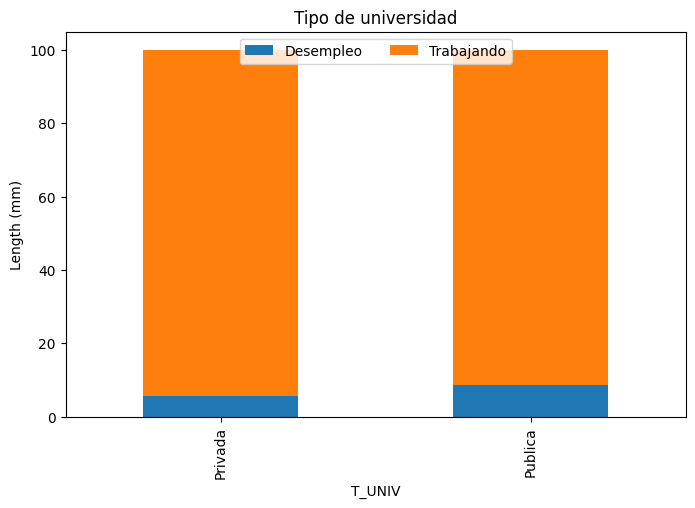

In [801]:
# Gráfico porcentajes
fig, ax = plt.subplots(figsize=(8, 5))
porcentaje_empleo['TRBPRN1'].unstack().plot(kind='bar', ax=ax,stacked=True)

ax.set_ylabel('Length (mm)')
ax.set_title('Tipo de universidad')
ax.legend(loc='upper center', ncols=2)

plt.show()

Como se puede observar en el gráfico, el desempleo de las universidades públicas es mayor que en las universidades privadas

##### **Situación laboral nada más terminar los estudios por tipo de universidad**

La variable **HATR_E11** nos aporta información sobre el tiempo transcurrido desde que finalizó los estudios hasta que empezó a trabajar. La codificación de la variable es la siguiente:

0	Continuó al menos 6 meses más en el trabajo que tenía mientras estudiaba

1	Menos de tres meses

2	De 3 a 6 meses

3	De 6 meses a 1 año

4	De 1 año a  año y medio  

5	De 1 año y medio a  2 años 

6	2 ó más años

9	NS/NC

NaN 	No aplicable


In [790]:
# Nos quedamos con aquellos campos no nulos y filtramos para excluir el grupo con el valor 9 (NS/NC)
students_primer_empleo = students.copy()
students_primer_empleo = students_primer_empleo[(students_primer_empleo['HATR_E11'].notnull()) & (students_primer_empleo['HATR_E11']!=9)] 

In [791]:
# Diccionario con la nueva codificación para la columna. Agruparemos los datos en dos principales grupos:
# Los que encontraron trabajo en menos de un año y los que tardaron más de un año
tiempo_primer_empleo = {0: "Menos de 1 año", 1: "Menos de 1 año", 2: "Menos de 1 año", 3: "Menos de 1 año", 4:"Más de 1 año", 5:"Más de 1 año", 6:"Más de 1 año"}

# Reemplaza los valores en la columna 'HATR_E11'
students_primer_empleo['HATR_E11'] = students_primer_empleo['HATR_E11'].replace(tiempo_primer_empleo)

In [792]:
# Calcular los porcentajes de tiempo transcurrido hasta el primer empleo por tipo de universidad
data_porcentaje_empleo = students_primer_empleo.groupby('T_UNIV')['HATR_E11'].value_counts(normalize=True) * 100

porcentaje__primer_empleo = pd.DataFrame(data_porcentaje_empleo) # Creamos un DataFrame para almacenar la información
#porcentaje_empleo.rename_axis(['T_Univ','Tiempo hasta el primer empleo'])
porcentaje__primer_empleo

HATR_E11
T_UNIV  HATR_E11                 
Privada Menos de 1 año  81.810193
        Más de 1 año    18.189807
Publica Menos de 1 año  70.842085
        Más de 1 año    29.157915

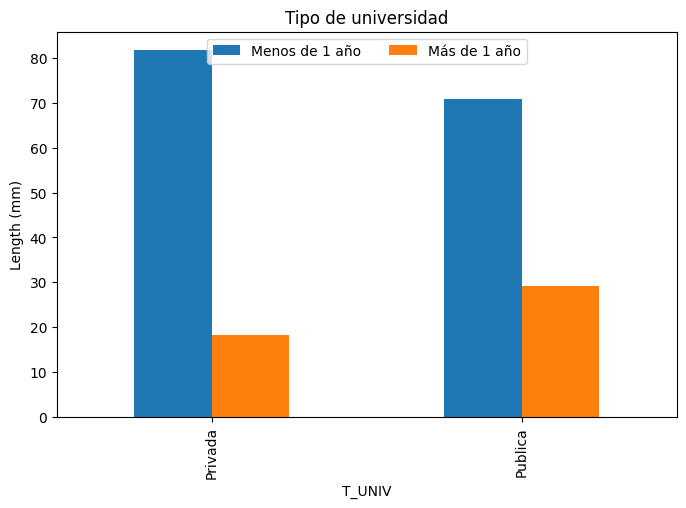

In [793]:
# Gráfico porcentajes
fig, ax = plt.subplots(figsize=(8, 5))
porcentaje__primer_empleo['HATR_E11'].unstack().plot(kind='bar', ax=ax)

ax.set_ylabel('Length (mm)')
ax.set_title('Tipo de universidad')
ax.legend(loc='upper center', ncols=2)
#plt.legend(loc='center right', labels=['Sin Empleo', 'Con Empleo'])

plt.show()

Mayor porcentaje de los estudiantes de las universidades privadas, al terminar sus estudios universitarios, encontraron trabajo antes que aquellos que cursaron su grado en una universidad pública

##### **Situación laboral en el primer empleo**

##### **Estudios del padre por tipo de universidad**

##### **Estudios de la madre por tipo de universidad**

##### **Cómo afectan las prácticas al empleo. Tipos de prácticas por universidad**

##### **Rama/Ámbito por tipo de universidad**

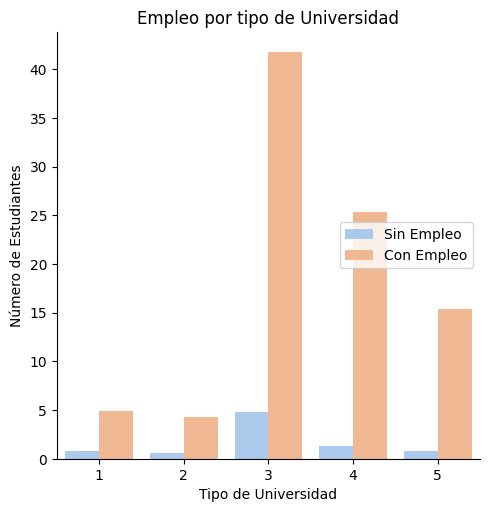

In [704]:
# Según el tipo de universidad (T_UNIV), 

# Gráfico de barras utilizando catplot
sns.catplot(x='RAMA', hue='TRBPRN1', data=students_grado, kind='count', palette='pastel',legend=False, stat="percent")

# Títulos y leyenda
plt.title('Empleo por tipo de Universidad')
plt.xlabel('Tipo de Universidad')
plt.ylabel('Número de Estudiantes')
plt.legend(loc='center right', labels=['Sin Empleo', 'Con Empleo'])

# Mostrar el gráfico
plt.show()

In [705]:
# Diccionario con la nueva codificación para la columna 'T_UNIV'
tipo_uni = {1: 1, 2: 1, 3: 2, 4: 2}

# Reemplaza los valores en la columna 'T_UNIV'
students['T_UNIV'] = students['T_UNIV'].replace(tipo_uni)